Inference for binomial proportion (Matlab/Python)

Algae status is monitored in 274 sites at Finnish lakes and rivers. The observations for the 2008 algae status at each site are presented in file algae.txt (’0’: no algae, ’1’: algae present). Let $\pi$ be the probability of a monitoring site having detectable blue-green algae levels.

Use a binomial model for observations and a $Beta(2, 10)$ prior for $\pi$ in Bayesian inference. Formulate Bayesian model (likelihood $p(y|\pi)$ and prior $p(\pi)$) and use your model to answer the following questions:

Hint: With a conjugate prior a closed form posterior is Beta form (see equations in the book). You can then use betapdf, betacdf and betainv functions in Matlab, or functions in class scipy.stats.beta in Python.

### a) 
**What can you say about the value of the unknown $\pi$ according to the observations and your prior knowledge? Summarize your results using point and interval estimates.**

The following is given:

$$p(y|\pi) = Binom(\pi) = {n \choose y}  \pi^y(1-\pi)^{n-y} $$

$$p(\pi) = Beta(2, 10) = \frac{\pi^{2-1}(1-\pi)^{10-1}}{B(2,10)} $$

Using bayes rule to get the posterior

$$p(\pi|y) = \frac{p(y|\pi)p(\pi)}{p(y)}$$

Inserting the definitions of $p(y|\pi)$ and $p(\pi)$

$$p(\pi|y) = \frac{{n \choose y}  \pi^y(1-\pi)^{n-y}\frac{\pi^{2-1}(1-\pi)^{10-1}}{B(2,10)}}{p(y)}$$

Re-arranging all the constant terms

$$p(\pi|y) = \frac{{n \choose y}}{p(y)B(2,10)} \pi^y(1-\pi)^{n-y}\pi^{2-1}(1-\pi)^{10-1}$$

Dropping the constant term

$$p(\pi|y) \propto \pi^y(1-\pi)^{n-y}\pi^{2-1}(1-\pi)^{10-1}$$

Reducing

$$p(\pi|y) \propto \pi^{y+2-1}(1-\pi)^{n-y+10-1}$$

This is a $Beta(y+2, n-y+10)$ distribution.

Mean: 0.160839, variance: 0.000470
95 central interval: (0.12065601480266504, 0.20551209692962358)


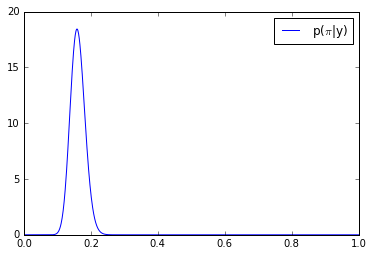

In [7]:
%matplotlib inline
import matplotlib.pyplot as plt
import scipy.stats as stats
import numpy as np
data = np.loadtxt('algae.txt')
y = data.sum()
n = data.size

a = y + 2
b = n - y + 10
print "Mean: %f, variance: %f"%(stats.beta.stats(a,b))
print "95 central interval: %s"%(stats.beta.interval(0.95,int(a),int(b)),)
x = np.linspace(0, 1, 1000)
pdf = stats.beta.pdf(x, a, b)
plt.plot(x, pdf, label='p($\pi$|y)')
plt.legend()
plt.show()

### B) 
**Is the proportion of monitoring sites with detectable algae levels $\pi$ smaller than $\pi_0 = 0.2$ that is known from historical records?**

The probability that $\pi \leq 0.2$ is

In [6]:
stats.beta.cdf(0.2, a, b)

0.95861358719485545

### C) 
**What assumptions are required in order to use this kind of a model with this type of data?**

We assume that the samples are i.i.d and follows a binomial probability distribution, and that the prior on $\pi$ is a $Beta(2,10)$ distribution.

### D) 
**Make prior sensitivity analysis by testing different reasonable priors. Summarize the results by one or two sentences.**

We'll compare to a uniform prior and a prior based on assumed historical records. Assuming we have 10 years of data with a mode of 0.2 and we have 274 samples per year. This corresponds roughly to a $Beta(549, 2190)$ prior. Luckily $Beta(1,1)$ is equal to the uniform distribution, so we can use the equations from question A for both comparisons.

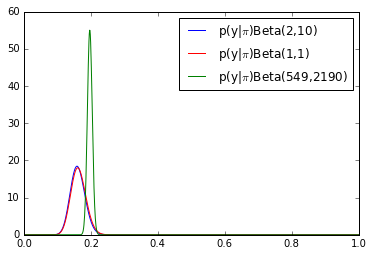

In [5]:
a_uniform = y + 1
b_uniform = n - y + 1
pdf_uniform = stats.beta.pdf(x, a_uniform, b_uniform)

a_strong = y + 549
b_strong = n - y + 2190
pdf_strong = stats.beta.pdf(x, a_strong, b_strong)
plt.plot(x, pdf, label='p(y|$\pi$)Beta(2,10)')
plt.plot(x, pdf_uniform, 'r', label='p(y|$\pi$)Beta(1,1)')
plt.plot(x, pdf_strong, label='p(y|$\pi$)Beta(549,2190)')
plt.legend()
plt.show()

In summary, with weak priors the posterior does not change much, but you can drown out the data with a strong enough prior.